In [257]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

import os
import glob as gb
import cv2 
import tensorflow as tf
import keras 
import os

In [258]:
trainpath = 'Car-Bike-Dataset/'

for folder in os.listdir(trainpath):
    files = gb.glob(pathname= str(trainpath +folder+'/*.jpg'))+gb.glob(pathname= str(trainpath +folder+'/*.jpeg'))+gb.glob(pathname= str(trainpath +folder+'/*.png'))
    print(f'For training data, found {len(files)} in folder {folder}')



For training data, found 1997 in folder Bike
For training data, found 2000 in folder Car


In [259]:
valid_formats = ['.jpg', '.jpeg', '.png']  # valid file formats to read

size = []
for folder in os.listdir(trainpath):
    files = gb.glob(pathname=os.path.join(trainpath, folder, '*'))
    for file in files:
        ext = os.path.splitext(file)[1].lower()  # get the file extension
        if ext in valid_formats:
            try:
                image = cv2.imread(file) #cv2
                size.append(image.shape)
            except:
                print(f"Error reading file {file}")
        else:
            print(f"Skipping file {file}: not a valid image format")
            
print(pd.Series(size).value_counts())

(183, 275, 3)      821
(100, 100, 3)      515
(168, 300, 3)      471
(194, 259, 3)      291
(192, 262, 3)       94
                  ... 
(236, 213, 3)        1
(5840, 3822, 3)      1
(5593, 3729, 3)      1
(393, 480, 3)        1
(138, 364, 3)        1
Length: 432, dtype: int64


In [260]:
code={'Car' : 0,'Bike' : 1 }
def getcode(n):
    for x,y in code.items():
        if n==y:
            return x


In [274]:
s=100
x_train=[]
y_train=[]
for folder in os.listdir(trainpath ):
    files=gb.glob(pathname=str(trainpath +folder+'/*.jpg'))+gb.glob(pathname= str(trainpath +folder+'/*.jpeg'))+gb.glob(pathname= str(trainpath +folder+'/*.png'))
    for file in files:
        image=cv2.imread(file)
        image_array=cv2.resize(image,(s,s))
        x_train.append(list(image_array))
        y_train.append(code[folder]) 
    

In [275]:
print(f'we have {len(x_train)} items in x_train')
print(f'we have {len(y_train)} items in y_train')

we have 3997 items in x_train
we have 3997 items in y_train


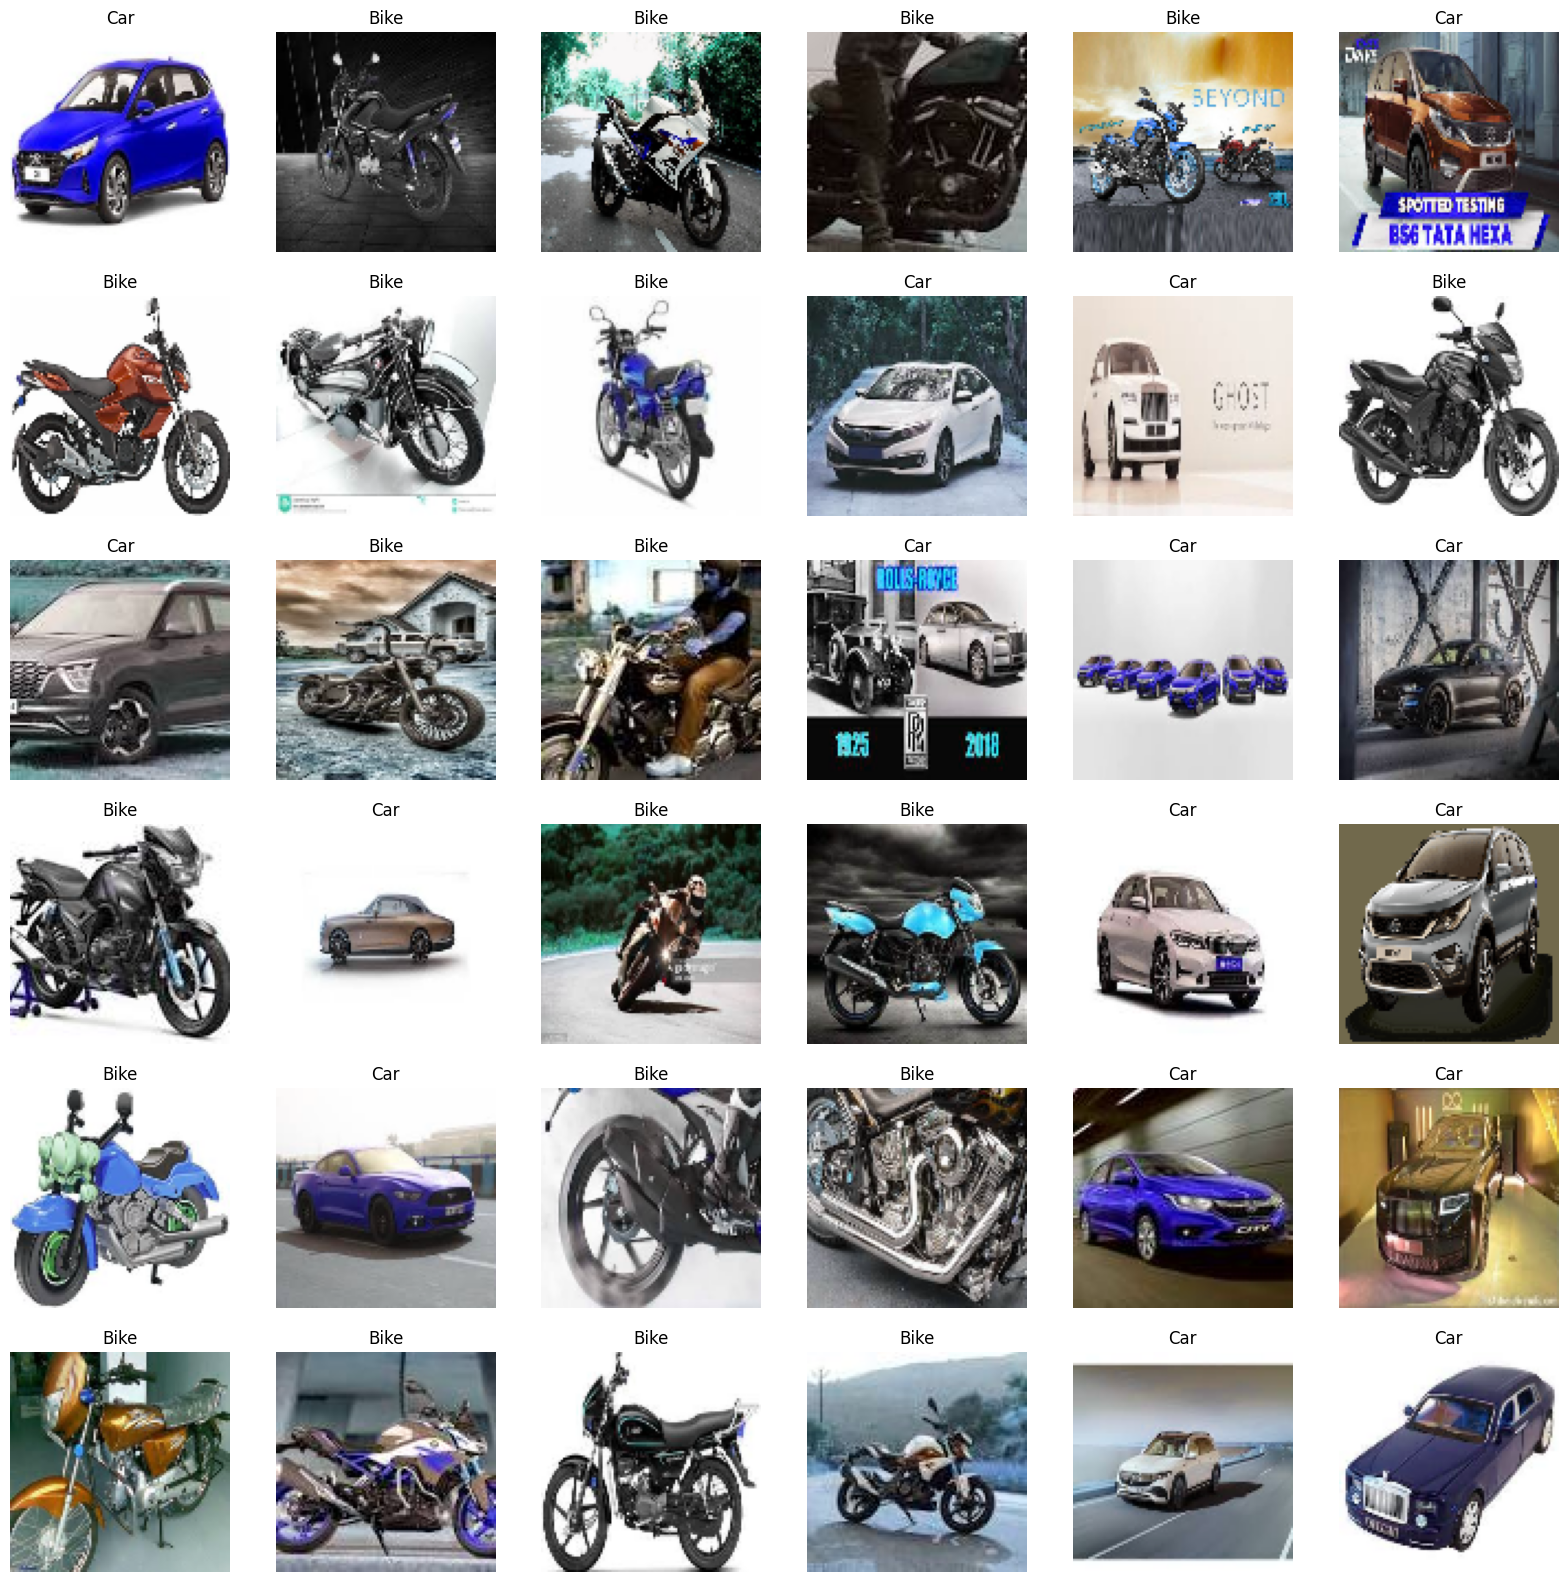

In [276]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [277]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.2)

print(f'we have {len(x_train)} items in x_train')
print(f'we have {len(x_test)} items in x_test')

we have 3197 items in x_train
we have 800 items in x_test


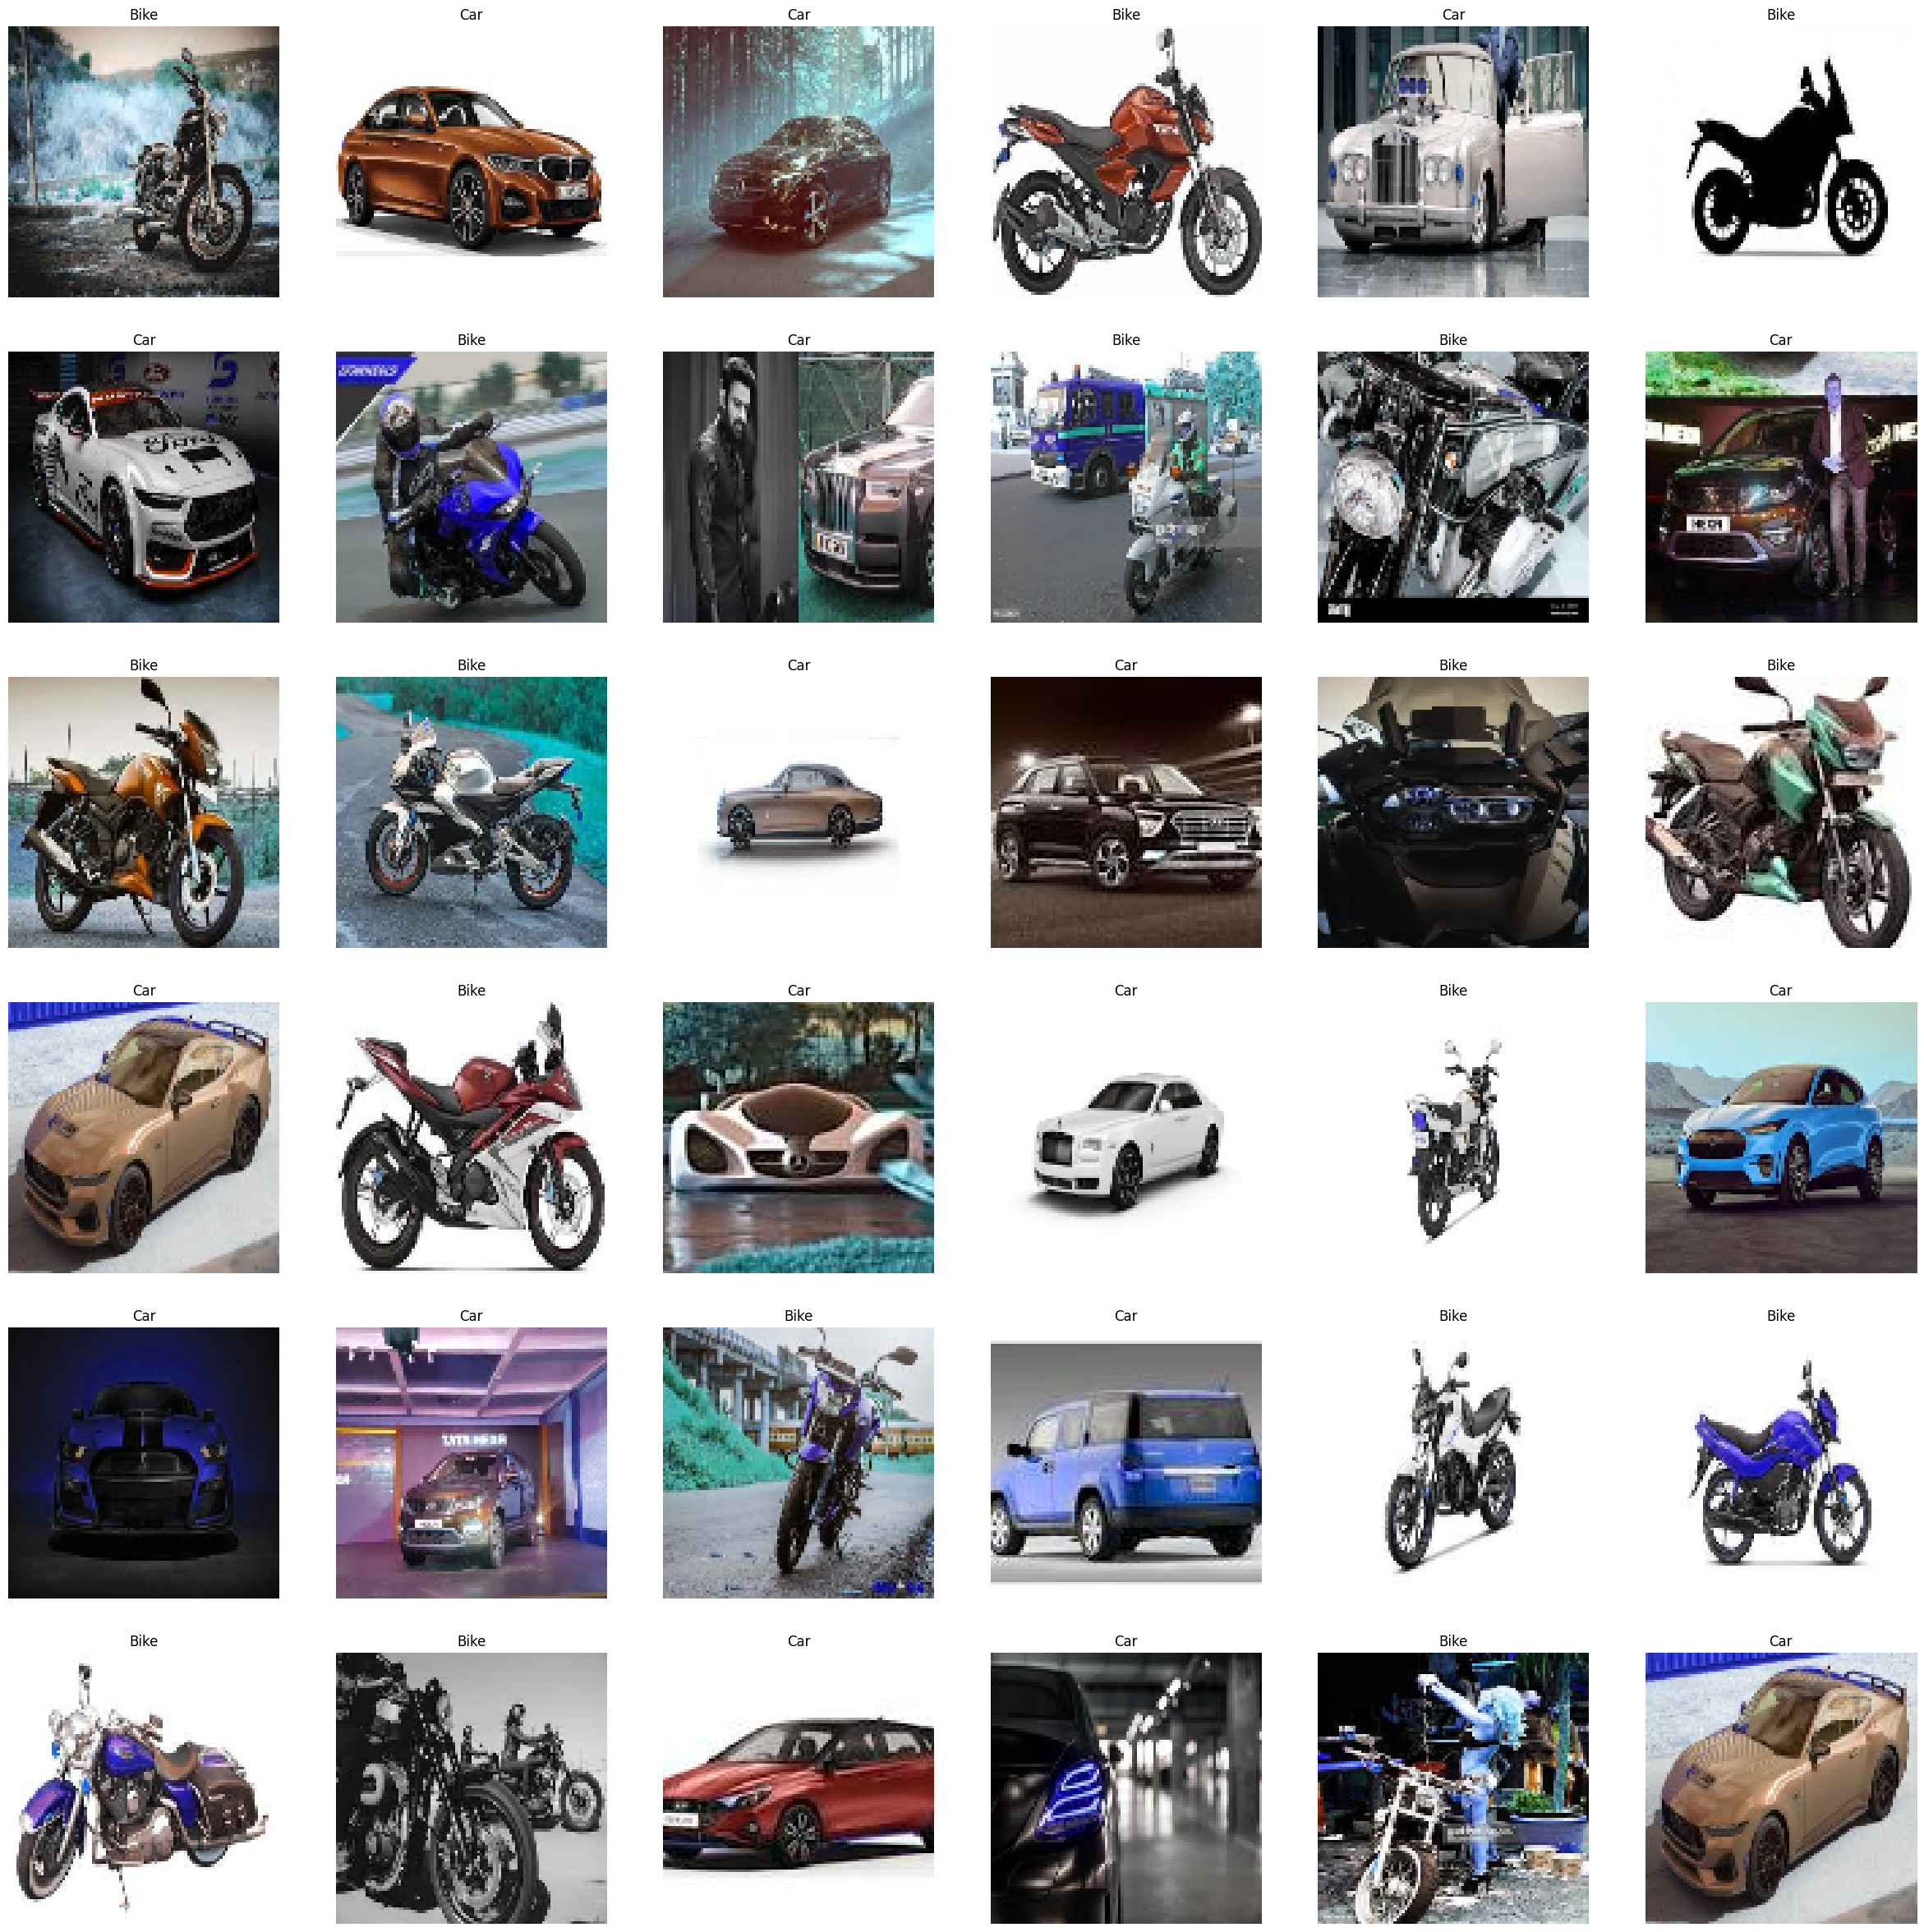

In [278]:
plt.figure(figsize=(30,30))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

    Build The Model

In [279]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train/255
y_train/255



print(f'X_train shape  is {x_train.shape}')
print(f'X_test shape  is {x_test.shape}')

print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (3197, 100, 100, 3)
X_test shape  is (800, 100, 100, 3)
y_train shape  is (3197,)
y_test shape  is (800,)


In [315]:
with tf.device('/GPU:0'):
    KerasModel = keras.models.Sequential([
            keras.layers.Conv2D(200,kernel_size=(3,3),padding='same',activation='relu',input_shape=(s,s,3)),
            keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),
            keras.layers.MaxPool2D(4,4),   
            keras.layers.Conv2D(80,kernel_size=(3,3),padding='same',activation='relu'),    
            keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
            keras.layers.Flatten() ,
            keras.layers.Dense(120,activation='relu') ,
            keras.layers.Dropout(rate=0.2) ,
            keras.layers.Dense(100,activation='relu') ,
            keras.layers.Dense(50,activation='relu') ,        
            keras.layers.Dropout(rate=0.3) ,            
            keras.layers.Dense(2,activation='sigmoid') ,    
            ])
    KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [316]:
print(KerasModel.summary())

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_172 (Conv2D)          (None, 100, 100, 200)     5600      
_________________________________________________________________
conv2d_173 (Conv2D)          (None, 98, 98, 120)       216120    
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 24, 24, 120)       0         
_________________________________________________________________
conv2d_174 (Conv2D)          (None, 24, 24, 80)        86480     
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 22, 22, 50)        36050     
_________________________________________________________________
flatten_43 (Flatten)         (None, 24200)             0         
_________________________________________________________________
dense_172 (Dense)            (None, 120)             

In [317]:
epochs = 12
ThisModel = KerasModel.fit(x_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/12
50/50 [==============================] - 12s 223ms/step - loss: 1.8290 - accuracy: 0.5396
Epoch 2/12
50/50 [==============================] - 11s 224ms/step - loss: 0.6041 - accuracy: 0.7135
Epoch 3/12
50/50 [==============================] - 11s 229ms/step - loss: 0.4568 - accuracy: 0.8026
Epoch 4/12
50/50 [==============================] - 11s 225ms/step - loss: 0.3450 - accuracy: 0.8658
Epoch 5/12
50/50 [==============================] - 11s 227ms/step - loss: 0.2280 - accuracy: 0.9146
Epoch 6/12
50/50 [==============================] - 11s 228ms/step - loss: 0.1453 - accuracy: 0.9449
Epoch 7/12
50/50 [==============================] - 11s 227ms/step - loss: 0.1150 - accuracy: 0.9584
Epoch 8/12
50/50 [==============================] - 11s 226ms/step - loss: 0.0930 - accuracy: 0.9656
Epoch 9/12
50/50 [==============================] - 11s 225ms/step - loss: 0.0569 - accuracy: 0.9769
Epoch 10/12
50/50 [==============================] - 11s 225ms/step - loss: 0.0386 - accura

In [318]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(x_test, y_test)

print('Test Loss is {}'.format(ModelLoss))

print('Test Accuracy is {}'.format(ModelAccuracy ))

25/25 [==============================] - 1s 27ms/step - loss: 0.2813 - accuracy: 0.9325
Test Loss is 0.28134405612945557
Test Accuracy is 0.9325000047683716


In [295]:
y_pred = KerasModel.predict(x_test)

print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (800, 2)


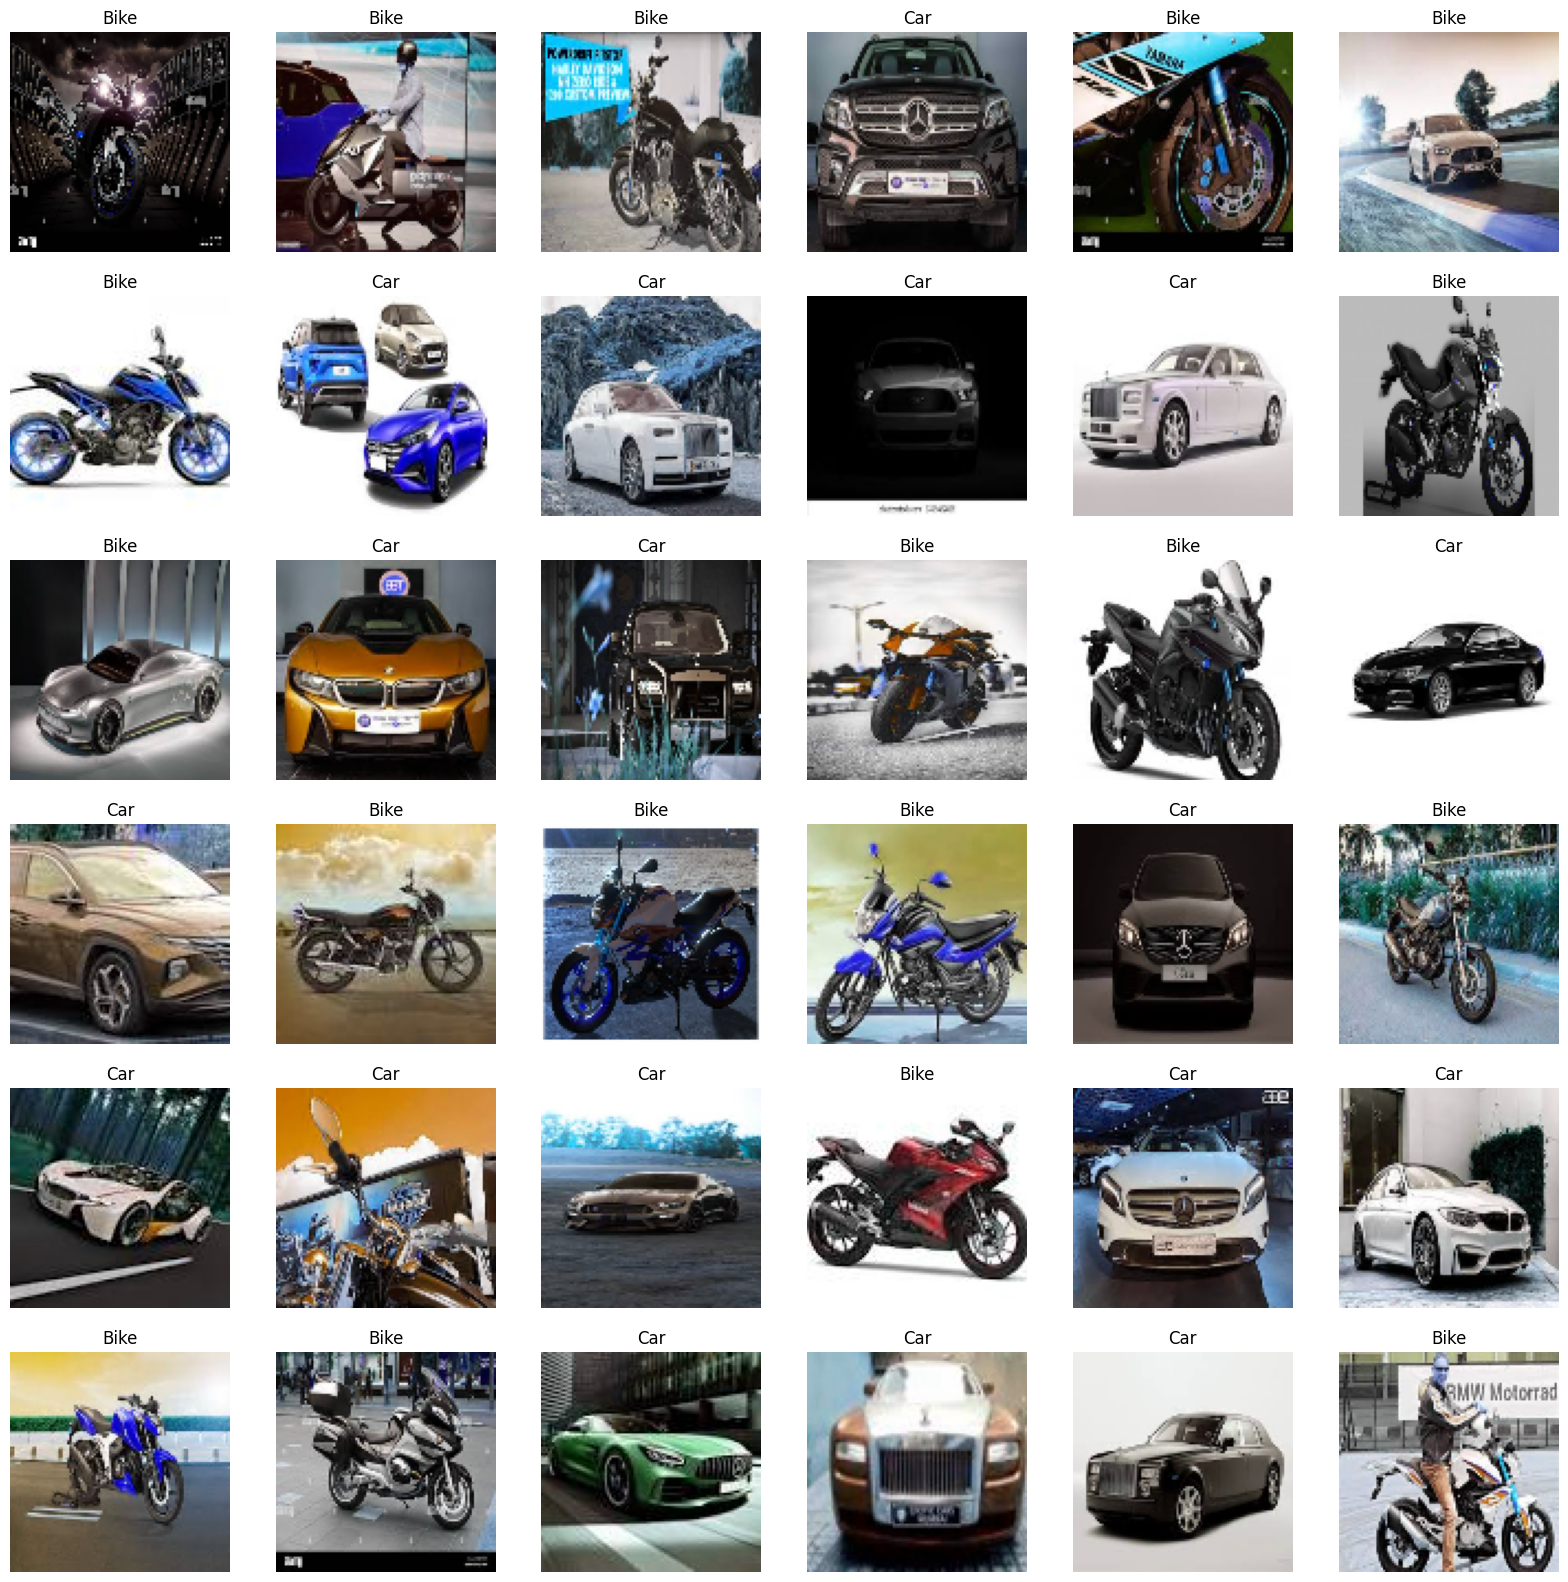

In [319]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.title(getcode(np.argmax(y_pred[i])))